In [210]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data_df = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
city_ride_data_df = city_ride_data_df[['city','date','fare','ride_id','driver_count','type']]

# Display the data table for preview
city_ride_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

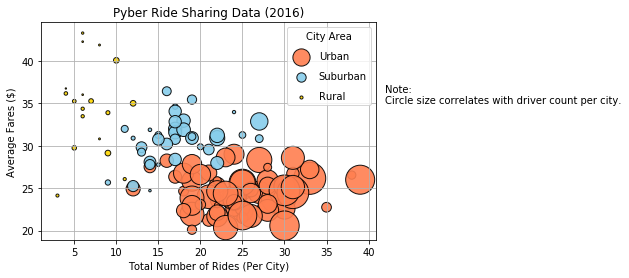

In [211]:
# Obtain the x and y coordinates for each of the three city types

# Urban
urban_city_ride_data_df = city_ride_data_df[city_ride_data_df['type'] == 'Urban']
urban_city_ride_data_by_city_df = pd.DataFrame(urban_city_ride_data_df.groupby('city').agg(
    {
        'fare':'mean',
        'ride_id':'count',
        'driver_count':'sum'
    }))
urban_city_ride_data_by_city_df = urban_city_ride_data_by_city_df.rename(columns={'ride_id':'Total Number of Rides',
    'fare':'Average Fare','driver_count':'Total Driver Count'})

urban_x = urban_city_ride_data_by_city_df['Total Number of Rides']
urban_y = urban_city_ride_data_by_city_df['Average Fare']
urban_z = urban_city_ride_data_by_city_df['Total Driver Count']

# Suburban
suburban_city_ride_data_df = city_ride_data_df[city_ride_data_df['type'] == 'Suburban']
suburban_city_ride_data_by_city_df = pd.DataFrame(suburban_city_ride_data_df.groupby('city').agg(
    {
        'fare':'mean',
        'ride_id':'count',
        'driver_count':'sum'
    }))
suburban_city_ride_data_by_city_df = suburban_city_ride_data_by_city_df.rename(columns={'ride_id':'Total Number of Rides',
    'fare':'Average Fare','driver_count':'Total Driver Count'})

suburban_x = suburban_city_ride_data_by_city_df['Total Number of Rides']
suburban_y = suburban_city_ride_data_by_city_df['Average Fare']
suburban_z = suburban_city_ride_data_by_city_df['Total Driver Count']

# Rural
rural_city_ride_data_df = city_ride_data_df[city_ride_data_df['type'] == 'Rural']
rural_city_ride_data_by_city_df = pd.DataFrame(rural_city_ride_data_df.groupby('city').agg(
    {
        'fare':'mean',
        'ride_id':'count',
        'driver_count':'sum'
    }))
rural_city_ride_data_by_city_df = rural_city_ride_data_by_city_df.rename(columns={'ride_id':'Total Number of Rides',
    'fare':'Average Fare','driver_count':'Total Driver Count'})

rural_x = rural_city_ride_data_by_city_df['Total Number of Rides']
rural_y = rural_city_ride_data_by_city_df['Average Fare']
rural_z = rural_city_ride_data_by_city_df['Total Driver Count']


# Build the scatter plots for each city types
plt.scatter(
    urban_x, 
    urban_y, 
    s=urban_z*.45, 
    alpha=.9, c="coral", edgecolors="black", label="Urban")

plt.scatter(
    suburban_x, 
    suburban_y, 
    s=suburban_z*.45, 
    alpha=.9, c="skyblue", edgecolors="black", label="Suburban")

plt.scatter(
    rural_x, 
    rural_y, 
    s=rural_z*.45, 
    alpha=.9, c="gold", edgecolors="black", label="Rural")

# Set our legend to where the chart thinks is best
plt.legend(loc="best")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fares ($)")
plt.title('Pyber Ride Sharing Data (2016)')
plt.grid()

# Create a legend
plt.legend(frameon=True, labelspacing=1, title='City Area', markerscale=0.75, loc="best")

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("./output/Fare_Average_by_Type.png")


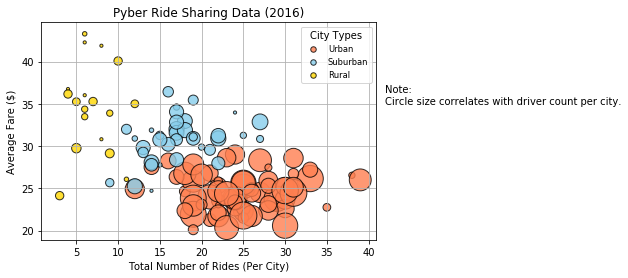

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

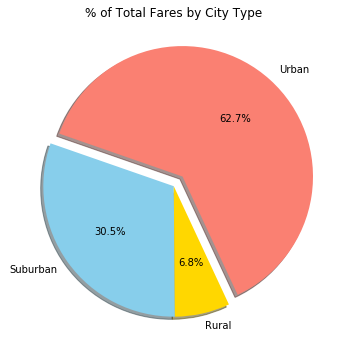

In [212]:
# Calculate Type Percents

city_ride_data_by_type_df = pd.DataFrame(city_ride_data_df.groupby('type').agg(
    {
        'type':'first',
        'fare':'sum'
    }))
urban_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Urban']
suburban_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Suburban']
rural_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Rural']

# Build Pie Chart
plt.figure(figsize=[6, 6])
plt.title('% of Total Fares by City Type')

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart

#sizes = [urban_total['fare'], suburban_total['fare'], rural_total['fare']]
sizes = [int(urban_total['fare']), int(suburban_total['fare']), int(rural_total['fare'])]

# The colors of each section of the pie chart
colors = ["salmon", "skyblue", "gold"]

# Tells matplotlib to seperate the Urban section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=295)

# Save Figure
plt.savefig("./output/PieChart_Fares_by_Type.png")

plt.show()


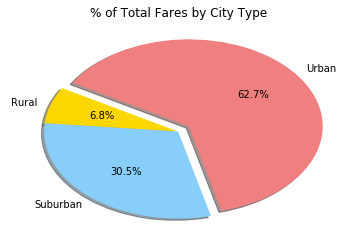

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

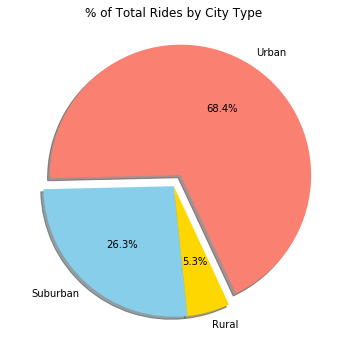

In [213]:
# Calculate Type Percents

city_ride_data_by_type_df = pd.DataFrame(city_ride_data_df.groupby('type').agg(
    {
        'type':'first',
        'ride_id':'count'
    }))
urban_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Urban']
suburban_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Suburban']
rural_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Rural']

# Build Pie Chart
plt.figure(figsize=[6, 6])
plt.title('% of Total Rides by City Type')

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart

sizes = [int(urban_total['ride_id']), int(suburban_total['ride_id']), int(rural_total['ride_id'])]

# The colors of each section of the pie chart
colors = ["salmon", "skyblue", "gold"]

# Tells matplotlib to seperate the Urban section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=295)

# Save Figure
plt.savefig("./output/PieChart_Rides_by_Type.png")

plt.show()


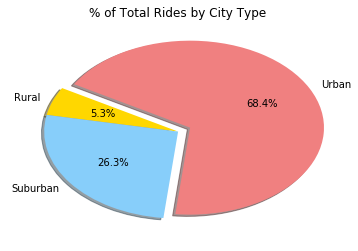

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

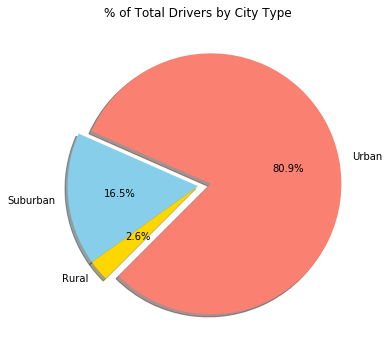

In [214]:
# Calculate Type Percents

city_data_df = pd.DataFrame(city_data)
city_ride_data_by_type_df = pd.DataFrame(city_data_df.groupby('type').agg(
    {
        'type':'first',
        'driver_count':'sum'
    }))
urban_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Urban']
suburban_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Suburban']
rural_total = city_ride_data_by_type_df[city_ride_data_by_type_df['type'] == 'Rural']

# Build Pie Chart
plt.figure(figsize=[6, 6])
plt.title('% of Total Drivers by City Type')

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart

sizes = [int(urban_total['driver_count']), int(suburban_total['driver_count']), int(rural_total['driver_count'])]

# The colors of each section of the pie chart
colors = ["salmon", "skyblue", "gold"]

# Tells matplotlib to seperate the Urban section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=225)

# Save Figure
plt.savefig("./output/PieChart_Drivers_by_Type.png")

plt.show()

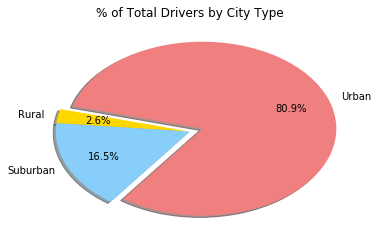

In [6]:
# Show Figure
plt.show()